# Discrete DPPs

In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2

from dppy.discrete_dpps import *
#from dppy.discrete_k_dpps import *
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


# Toy example: uniform spanning tree (UST) kernel

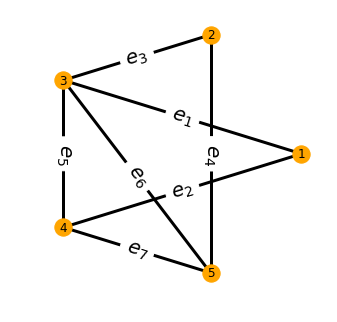

In [2]:
g = nx.Graph()
g.add_edges_from([(0,2), (0,3), (1,2), (1,4), (2,3), (2,4), (3,4)])
nx.set_node_attributes(g, 'color', 'orange')

edge_lab = [r'$e_{}$'.format(i) for i in range(1,g.number_of_edges()+1)]
edge_labels = dict(zip(g.edges(), edge_lab))
vertex_labels = dict(zip(g.nodes(), [i for i in range(1,g.number_of_nodes()+1)]))

fig = plt.figure(figsize=(4,4))

nx.draw_circular(g, node_color='orange', width = 3)
pos=nx.circular_layout(g)
nx.draw_networkx_labels(g,pos,vertex_labels)
nx.draw_networkx_edge_labels(g, pos, edge_labels = edge_labels, font_size= 20)

Inc_Mat=nx.incidence_matrix(g,oriented=True).toarray()

## Initilization of `Discrete_DPP` objects
```python
Discrete_DPP(kernel_type, projection, **params)
```
- ```python 
    kernel_type = "inclusion"/"marginal"
  ```
- ```python 
    projection = True/False
  ```


If you wish to get basic info about the object you can use either
```python
kernel_type, projection = "inclusion"/"marginal", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
print(DPP)
DPP.info()
```

### DPP defined through `kernel_type="inclusion"`
$P(S\subset X) = \det K_S$

with $0\preceq K\preceq I$

In [3]:
# Projection Kernel onto the rows of the incidence matrix
A = Inc_Mat[:-1,:] # A_zono
K = A.T.dot(np.linalg.inv(A.dot(A.T))).dot(A) # Projection kernel
K_eig_dec = la.eigh(K) #=(eig_vals, eig_vec)

#### Parameters
- `{"K": K}`
    - $0\preceq K \preceq I$
- `{"K_eig_dec": (eig_vals, eig_vecs)}`
    - $0 \leq eigvals \leq 1$
- `{"A_zono": A}`
    - $A (d\times N)$ with $rank(A)=d$

```python
kernel_type, projection = "K", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
```

In [4]:
kernel_type = "inclusion"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"K": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
        
        UST = Discrete_DPP(kernel_type, proj, **par)
        print(UST,"\n")
        
    print()

For projection kernel

DPP defined through projection inclusion kernel
Parametrized by dict_keys(['K'])
- sampling mode = None
- number of samples = 0 

DPP defined through projection inclusion kernel
Parametrized by dict_keys(['K_eig_dec'])
- sampling mode = None
- number of samples = 0 

DPP defined through projection inclusion kernel
Parametrized by dict_keys(['A_zono'])
- sampling mode = None
- number of samples = 0 


For non-projection kernel

DPP defined through inclusion kernel
Parametrized by dict_keys(['K'])
- sampling mode = None
- number of samples = 0 

DPP defined through inclusion kernel
Parametrized by dict_keys(['K_eig_dec'])
- sampling mode = None
- number of samples = 0 

DPP defined through inclusion kernel
Parametrized by dict_keys(['A_zono'])
- sampling mode = None
- number of samples = 0 




###### From any parametrization you can get back to the inclusion kernel $K$

```python
kernel_type, projection = "K", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
DPP.compute_K()
```

In [ ]:
kernel_type = "inclusion"

for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"K": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
        
        UST = Discrete_DPP(kernel_type, proj, **par)
        UST.compute_K()
        print()
        
    print()

###### But if you try to compute the $L$ kernel with a $K$ that is a projection you must encounter an error.
```python
kernel_type, projection = "K", True
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
DPP.compute_L()
!!!!ERROR!!!!
```

Since $K$ is projection it has some eigenvalues close to 1, so
$L=K(I-K)^{-1}$ cannot be computed

In [ ]:
kernel_type, projection = "inclusion", False# True/False
params = {"K": K}
UST = Discrete_DPP(kernel_type, projection, **params)
UST.compute_L()

In [ ]:
kernel_type, projection = "inclusion", False# True/False
params = {"K_eig_dec": K_eig_dec}
UST = Discrete_DPP(kernel_type, projection, **params)
UST.compute_L()

In [ ]:
kernel_type, projection = "inclusion", False# True/False
params = {"A_zono": A}
UST = Discrete_DPP(kernel_type, projection, **params)
UST.compute_L()

### DPP defined through `kernel_type="marginal"`
$L\succeq 0$

$P(X=S) \propto \det L_S = \dfrac{\det L_S}{\det(I+L)}$

#### Parameters
- `{"L": L}`

    - $L\succeq 0$

- `{"L_eig_dec": (eig_vals, eig_vecs)}`

    - $eigvals \geq 0$

- `{"L_gram_factor": Phi}`

    - $L = \Phi^{\top} \Phi$

    - $L' = \Phi\Phi^{\top}$
    
    
```python
kernel_type, projection = "L", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
```

In [ ]:
kernel_type = "marginal"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"L": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
        
        UST = Discrete_DPP(kernel_type, proj, **par)
        print(UST,"\n")
        
    print()

###### From any parametrization you can get back to the marginal kernel $L$

```python
kernel_type, projection = "marginal", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
DPP.compute_L()
```

In [ ]:
kernel_type = "marginal"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"L": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
        
        UST = Discrete_DPP(kernel_type, proj, **par)
        UST.compute_L()
        print()
    
    print()

###### And you should always be able to compute the inclusion kernel $K$
$K=L(I+L)^{-1}$

```python
kernel_type, projection = "marginal", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
DPP.compute_K()
```

In [ ]:
kernel_type = "marginal"
for proj in [True, False]:
    
    print("For {}projection kernel\n".format("non-" if not proj else ""))
    
    for par in [{"L": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
        
        UST = Discrete_DPP(kernel_type, proj, **par)
        UST.compute_K()
        print()
    
    print()

## Sampling
Samples are saved in the list_of_samples attribute
```python
DPP.list_of_samples
```
You can flush previous samples using
```python
DPP.flush_samples()
```

### Exact sampling
- `sampling_mode="GS"` (default)
    - Gram-Schmidt
- `sampling_mode="GS_bis"`
    - Slight modif of "GS"
- `sampling_mode="KuTa12`
    - Kulesza algo

```python
kernel_type, projection = "inclusion"/"marginal", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
DPP.sample_exact(sampling_mode)
```

##### $K$ (inclusion) kernel

In [ ]:
kernel_type, projection = "inclusion", False# True/False
for par in [{"K": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
    
    print(par.keys())
    
    for samp_mod in ["GS", "GS_bis", "KuTa12"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(kernel_type, projection, **par)
        UST.sample_exact(sampling_mode=samp_mod)
        print(UST.list_of_samples)

    print()

##### $L$  (marginal) kernel

In [ ]:
kernel_type, projection = "marginal", True# True/False
for par in [{"L": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
    
    print(par.keys())
    
    for samp_mod in ["GS", "GS_bis", "KuTa12"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(kernel_type, projection, **par)
        UST.sample_exact(sampling_mode=samp_mod)
        print(UST.list_of_samples)

    print()

### MCMC sampling
```python
sampling_mode=
```
- `"AED"` Add-Exchange-Delete
- `"AD"` Add-Delete
- `"E"` Exchange
- `"zonotope"` Zonotope sampling
    
```python
!!!NOTE!!!
```
- `"AED"` and `"AD"` require the availability of $L$ kernel
- For projection $K$ (inclusion) kernel you can only use
    - `"E"`
    - `"zonotope"`` if "A_zono" provided


```python
sampl_params={}
```
- `"s_init"` (default None) Starting state of the Markov chain
- `"nb_iter_max"` (default 10) Number of iterations of the chain
- `"T_max"` (default None) Time horizon
- `"size"` (default None) Size of the initial sample for `sampling_mode="AD"/"E"`
    - $=Tr(K)$ for projection $K$ (inclusion) kernel and `sampling_mode="E"`

```python
kernel_type, projection = "inclusion"/"marginal", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
sampl_params = {"s_init": None, "nb_iter_max": 10, "T_max":, size}
DPP.sample_exact(sampling_mode, **sampl_params)
```

##### For projection $K$ (inclusion) kernel

In [ ]:
kernel_type, projection = "inclusion", True
for par in [{"K": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]:
    
    print(par.keys())
    
    for samp_mod in ["E", "zonotope"] if "A_zono" in par.keys() else ["E"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(kernel_type, projection, **par)
        UST.sample_mcmc(sampling_mode=samp_mod) # default 10 MC steps
        print(UST.list_of_samples)
        print()

    print()

##### For NON projection $K$ (inclusion) kernel

In [ ]:
kernel_type, projection = "inclusion", False

K_np = A.T.dot(A)/5 #/5 (checked by hand) to make sure eigenvalue are in [0,1]
K_np_eig_dec = la.eigh(K_np)

for par in [{"K": K_np}, {"K_eig_dec": K_np_eig_dec}]:
    
    print(par.keys())
    
    for samp_mod in ["AED", "AD", "E"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(kernel_type, projection, **par)
        UST.sample_mcmc(sampling_mode=samp_mod) # default 10 MC steps
        print(UST.list_of_samples)
        print()

    print()

For $L$ (marginal) kernel

In [ ]:
kernel_type, projection = "marginal", False# True/False
for par in [{"L": A.T.dot(A)}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]:
    
    print(par.keys())
    
    for samp_mod in ["AED", "AD", "E"]: 
        
        print(samp_mod)
        UST = Discrete_DPP(kernel_type, projection, **par)
        UST.sample_mcmc(sampling_mode=samp_mod) # default 10 MC steps
        print(UST.list_of_samples)
        print()

    print()

## Plotting
```python
kernel_type, projection = "inclusion"/"marginal", True/False
params = {...}
DPP = Discrete_DPP(kernel_type, projection, **params)
DPP.plot()
```

In [ ]:
K_ens_par = [{"K": K}, {"K_eig_dec": K_eig_dec}, {"A_zono": A}]
L_ens_par = [{"L": K}, {"L_eig_dec": K_eig_dec}, {"L_gram_factor": A}]

for ker_typ in ["inclusion", "marginal"]:
    
    print("For {} kernel\n".format(ker_typ))
    if ker_typ == "inclusion":
        params = K_ens_par
    elif ker_typ == "marginal":
        params = L_ens_par
    
    for proj in [True, False]:

        print("For {}projection kernel\n".format("non-" if not proj else ""))

        for par in params:
            print(par.keys())
            UST = Discrete_DPP(ker_typ, proj, **par)
            UST.plot()
            print()

        print()
        
    print()